In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import datetime

In [8]:
books = pd.read_csv('books_data.csv')
reviews = pd.read_csv('Books_rating.csv')

In [9]:
books.shape

(212404, 10)

In [10]:
reviews.shape

(3000000, 10)

### Duplicates

In [11]:
sum(books.duplicated())

0

In [12]:
sum(reviews.duplicated())

8774

#### Remove Duplicates

In [13]:
reviews = reviews[~reviews.duplicated()].reset_index(drop=True)

### Missing Values

In [14]:
books.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [15]:
books = books[~books['Title'].isnull()].reset_index(drop=True)

In [16]:
reviews.isnull().sum()

Id                          0
Title                     208
Price                 2510854
User_id                558559
profileName            558677
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

#### Deal with Missing Values

In [17]:
reviews = reviews[reviews[['Title', 'User_id', 'review/text']].isnull().sum(axis=1)==0].reset_index(drop=True)

In [18]:
# remove invalid review time
reviews = reviews[reviews['review/time']>0].reset_index(drop=True)

Depend on the features we use, remove NA rows, for example:
1. remove NA review text as it is our main input
2. remove NA user_id if we predict rating based on rating history

### Pre-Processing

In [19]:
reviews['review/time'] = reviews['review/time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [20]:
reviews[['positive helpfulness', 'helpfulness']] = reviews.apply(lambda x: x['review/helpfulness'].split('/'), axis=1, result_type='expand')

In [21]:
reviews['positive helpfulness'] = reviews['positive helpfulness'].apply(int)

In [22]:
reviews['helpfulness'] = reviews['helpfulness'].apply(int)

In [23]:
reviews = reviews.drop(columns = ['review/helpfulness'])

### EDA

#### Unique Values

In [24]:
books.nunique()

Title            212403
description      133226
authors          127277
image            149386
previewLink      188098
publisher         16016
publishedDate     11582
infoLink         184505
categories        10883
ratingsCount        478
dtype: int64

In [25]:
reviews.nunique()

Id                       216013
Title                    206710
Price                      5926
User_id                 1008954
profileName              854135
review/score                  5
review/time                5736
review/summary          1308578
review/text             1686351
positive helpfulness        664
helpfulness                 737
dtype: int64

#### Category Distribution

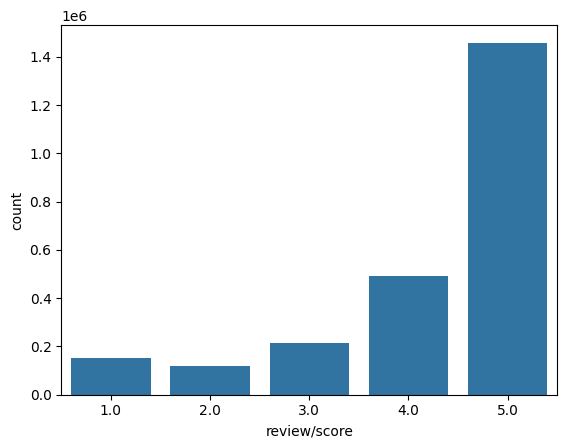

In [26]:
sns.countplot(data=reviews, x="review/score")
plt.show()

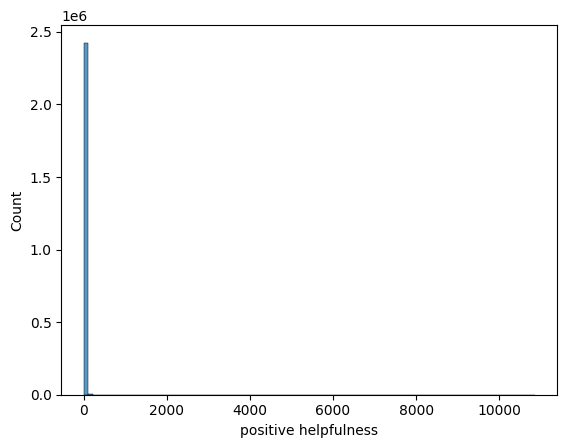

In [36]:
sns.histplot(data=reviews, x="positive helpfulness", bins=100)
plt.show()

#### Deal with Data Imbalance

#### Train-test split based on time or user or randomly?